### Demo MNIST 


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

2023-06-28 13:46:42.514624: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 13:46:42.577655: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 13:46:42.578382: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 13:46:43.892868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


**Data loading**

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


**Data plotting**

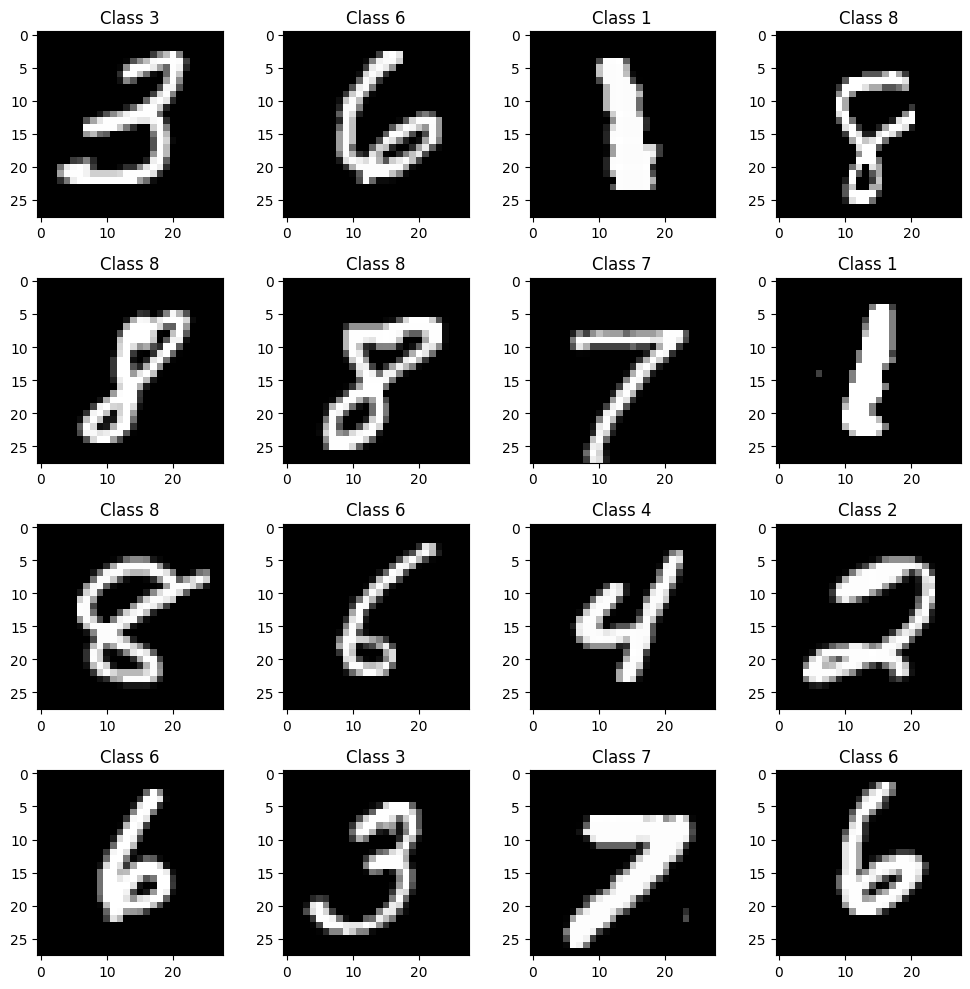

In [3]:
fig = plt.figure()
fig.set_size_inches(10, 10)
for i in range(16):
    plt.subplot(4,4,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title(f"Class {y_train[num]}")

plt.tight_layout()

**Data normalization :**

We normalize the train and test data such that each pixel is in [0, 1] (instead of [0, 255]). This usually helps the training !

In [4]:
X_train = X_train / 255
X_test = X_test / 255 

In [5]:
nb_classes = 10 # number of unique digits

# One hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

Y_train shape (60000, 10)
Y_test shape (10000, 10)


### **Fully connected network**

Create a fully connected network with :
- Two layers with 512 ouput neurons and ReLu activation.
- A final layer with 10 output neurons and a softmax activation.

Hint : You will need to flatten your image before the first dense layer. Use [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)



In [6]:
## To-do
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Train for 5 epochs :

In [12]:
## To-do
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0742 - val_accuracy: 0.9788
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0196 - accuracy: 0.9932 - val_loss: 0.1074 - val_accuracy: 0.9729
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0973 - val_accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0792 - val_accuracy: 0.9797
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0927 - val_accuracy: 0.9797


### **Convolutional Neural Network**

Create a Convolutional Neural Network. You will need to use [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) between the convolutional layers and the fully connected layers.

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1) # add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

###  Architecture :
- Two convolutional layers with 32 channels, ReLu activation and 3 by 3 kernels.
- 2 by 2 max pooling
- Two convolutional layers with 64 channels, ReLu activation and 3 by 3 kernels.
- 2 by 2 max pooling
- One dense layer with 512 ouput neurons and ReLu activation
- A dense layer with 10 output neurons and a softmax activation.


In [16]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [17]:
## To-do
cnn = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(strides=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(strides=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
]);

Train for 5 epochs :

In [23]:
## To-do
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.1134 - val_accuracy: 0.9795
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.1060 - val_accuracy: 0.9809
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.1040 - val_accuracy: 0.9805
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0913 - val_accuracy: 0.9836
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0928 - val_accuracy: 0.9826


### Check predictions

Plot a few misclassified images.

In [24]:
## To-do

y_hat = np.argmax(model.predict(X_test), axis=-1)
test_acc = np.mean(y_hat == y_test)
print(f"Test Accuracy: {test_acc * 100}%")

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 98.26%


In [25]:
correctIs = np.nonzero(y_hat == y_test)[0]
wrongIs = np.nonzero(y_hat != y_test)[0]

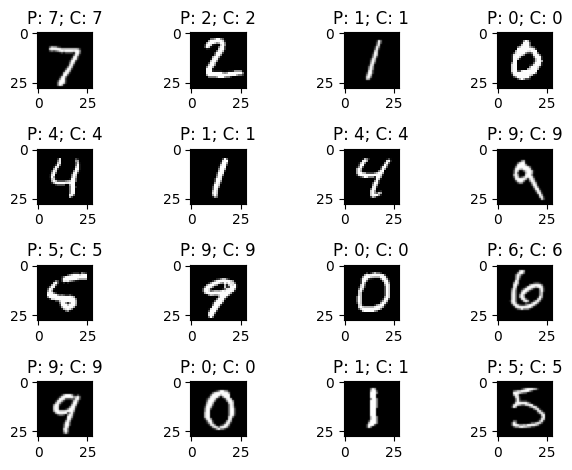

In [38]:
plt.figure()
fig.set_size_inches(12, 12)
for i, index in enumerate(correctIs[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[index].reshape((28, 28)), cmap="gray")
    plt.title(f"P: {y_hat[index]}; C: {y_test[index]}")

plt.tight_layout()
plt.show()

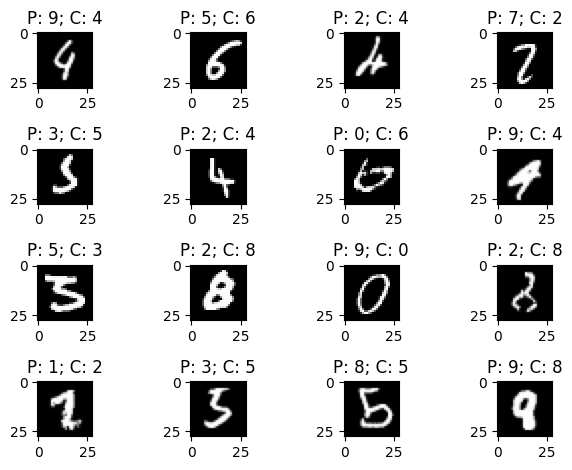

In [35]:
plt.figure()
fig.set_size_inches(12, 12)
for i, index in enumerate(wrongIs[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[index].reshape((28, 28)), cmap="gray")
    plt.title(f"P: {y_hat[index]}; C: {y_test[index]}")

plt.tight_layout()
plt.show()